In [1]:
# Importing the necessary libraries.
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Downloading the stock data for two years.
barc = yf.download('BARC.L', start ='2023-01-01', end = '2025-01-01')
hsba = yf.download('HSBA.L', start ='2023-01-01', end = '2025-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Reassigning the column headers to avoid any double heading problem in the future

barc.columns =['Close', 'High', 'Low', 'Open', 'Volume']
hsba.columns =['Close', 'High', 'Low', 'Open', 'Volume']

In [7]:
# Calculating the 20 and 50 day simple moving average and assigning a new column for each of them in both barc and hsba databases. 

barc['MA20'] = barc['Close'].rolling(20).mean()
hsba['MA20'] = hsba['Close'].rolling(20).mean()

barc['MA50'] = barc['Close'].rolling(50).mean()
hsba['MA50'] = hsba['Close'].rolling(50).mean()

In [9]:
# Dropping the nan values. 
barc = barc.dropna()
hsba = hsba.dropna()

In [11]:
# Reassigning the revevant columns to the database and deleting the rest. 
barc = barc[['Close', 'MA20', 'MA50']]
hsba = hsba[['Close', 'MA20', 'MA50']]

In [13]:
barc

,Close,MA20,MA50
Date,,,
2023-03-13,138.426254,158.589763,162.384515
2023-03-14,142.725082,157.189332,162.256737
2023-03-15,129.753510,155.811154,161.787861
2023-03-16,133.639359,154.533389,161.317589
2023-03-17,130.992462,153.176143,160.800211
...,...,...,...
2024-12-23,261.600006,264.659999,255.320001
2024-12-24,263.549988,264.789998,255.910000
2024-12-27,264.899994,265.087497,256.467000


In [15]:
hsba

,Close,MA20,MA50
Date,,,
2023-03-13,488.938354,525.534430,505.462642
2023-03-14,496.598236,524.907819,506.537475
2023-03-15,471.983459,522.920929,506.892692
2023-03-16,480.331757,521.096550,507.050494
2023-03-17,466.561340,518.470830,506.877729
...,...,...,...
2024-12-23,765.099976,750.560001,718.548058
2024-12-24,772.000000,752.530002,720.788868
2024-12-27,777.099976,754.789999,723.060674


In [17]:
# Populating the databases of both buy and sell signals. 
#The strategy buys when the 20-day MA crosses the 50-day MA, so when the MA20 is higher than MA50 it buys the stock 
#and sells when the MA20 lower than MA 50. It goes though the datasets and locates those instances using iloc function.

Buy_barc = []
Sell_barc = []

for i in range(len(barc)):
    if barc.MA20.iloc[i] > barc.MA50.iloc[i] \
    and barc.MA20.iloc[i-1] < barc.MA50.iloc[i-1]:
        Buy_barc.append(i)
    elif barc.MA20.iloc[i] < barc.MA50.iloc[i] \
    and barc.MA20.iloc[i-1] > barc.MA50.iloc[i-1]:
        Sell_barc.append(i)

In [19]:
#Getting the index numbers of the buying signals
Buy_barc

[37, 91, 131, 192, 240, 337]

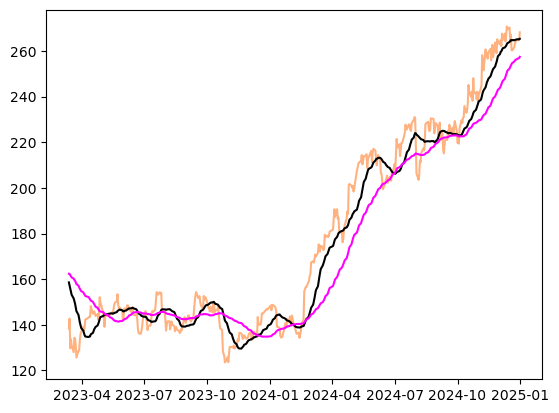

In [21]:
# Plotting the 20 and 50 moving averages to see the crossovers with the naked eye. It is purely just for representation. 

plt.plot(barc['Close'], label='Barclays Price', c='#FF6600', alpha=0.5)
plt.plot(barc['MA20'], label='MA20', c='black', alpha=1)
plt.plot(barc['MA50'], label='MA50', c='magenta', alpha=1)

In [23]:
# Finding the date and time when the buying signal occurs. 
barc.iloc[Buy_barc].index

DatetimeIndex(['2023-05-09', '2023-07-25', '2023-09-20', '2023-12-14',
               '2024-02-23', '2024-07-15'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [25]:
# Finding the price when the buying signal occurs. 
barc.iloc[Buy_barc].Close

Date
2023-05-09    144.151794
2023-07-25    153.481583
2023-09-20    152.549637
2023-12-14    143.391678
2024-02-23    156.526367
2024-07-15    222.795700
Name: Close, dtype: float64

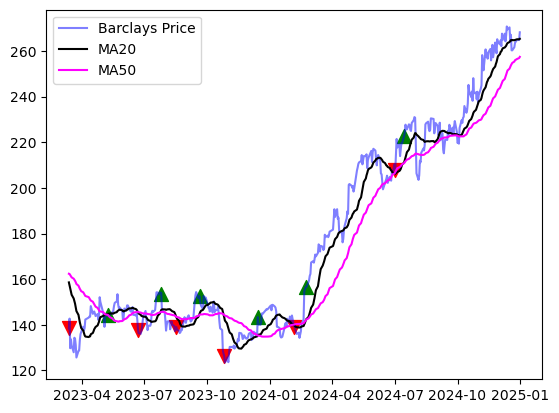

In [27]:
# Plotting the buys and sells on the same chart I have plotted before. 
# When the strategy buys, a green triangle appers, when the strategy sells a red triangle appears.
plt.plot(barc['Close'], label='Barclays Price', c='blue', alpha=0.5)
plt.plot(barc['MA20'], label='MA20', c='black', alpha=1)
plt.plot(barc['MA50'], label='MA50', c='magenta', alpha=1)
plt.scatter(barc.iloc[Buy_barc].index,barc.iloc[Buy_barc]['Close'], marker= '^', c='green', s=100)
plt.scatter(barc.iloc[Sell_barc].index,barc.iloc[Sell_barc]['Close'], marker= 'v', c='red', s=100)
plt.legend()
plt.show()

In [29]:
# Importing offsets to be able to get the dates and prices. 
from pandas.tseries.offsets import DateOffset

In [31]:
#Defining the buy and sell signals
buy_signal = barc.iloc[Buy_barc].Close

In [33]:
buy_signal

Date
2023-05-09    144.151794
2023-07-25    153.481583
2023-09-20    152.549637
2023-12-14    143.391678
2024-02-23    156.526367
2024-07-15    222.795700
Name: Close, dtype: float64

In [35]:
sell_signal = barc.iloc[Sell_barc].Close

In [37]:
#Creating the sell signals but removing the first date because the first signal is a sell signal and the trategy only goes long. 
sell_signal = sell_signal.iloc[1:]

In [39]:
sell_signal

Date
2023-06-22    137.938187
2023-08-17    139.013443
2023-10-26    126.414108
2024-02-05    139.261993
2024-07-02    207.991989
Name: Close, dtype: float64

In [41]:
#Combining the two datasets into one just to see the price changes between the buy and sell dates.
combined_df = pd.concat([buy_signal, sell_signal])
combined_df = combined_df.reset_index()
combined_df.columns = ['Date', 'Close']
combined_df = combined_df.sort_values(by='Date').reset_index(drop=True)

In [43]:
combined_df

,Date,Close
0,2023-05-09,144.151794
1,2023-06-22,137.938187
2,2023-07-25,153.481583
3,2023-08-17,139.013443
4,2023-09-20,152.549637
5,2023-10-26,126.414108
6,2023-12-14,143.391678
7,2024-02-05,139.261993
8,2024-02-23,156.526367
9,2024-07-02,207.991989


In [45]:
#Calculating the compounded return over the 2-year period. Note that the last trade is still going, so I did remove that from the statistic.
barc_returns_1 = (combined_df.Close.pct_change() + 1).cumprod()

In [47]:
barc_returns = barc_returns_1.iloc[1::2]

In [49]:
barc_returns

1    0.956895
3    0.964355
5    0.876951
7    0.966079
9    1.442868
Name: Close, dtype: float64

<Axes: >

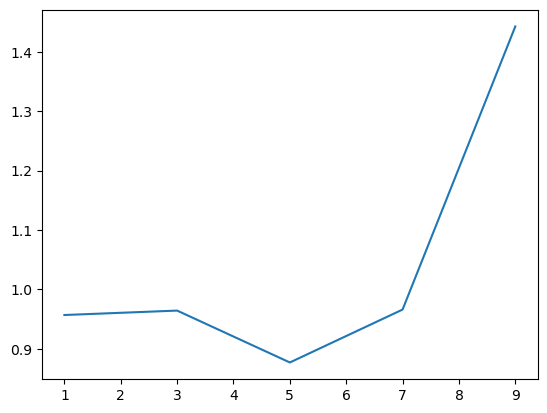

In [51]:
#Plotting the results. We would have made money using the strategy. 
barc_returns.plot()

In [53]:
# HSBC Bank moving average strategy, doing the same as with Barclay's:

In [55]:
Buy_hsba = []
Sell_hsba = []

for i in range(len(barc)):
    if hsba.MA20.iloc[i] > hsba.MA50.iloc[i] \
    and hsba.MA20.iloc[i-1] < hsba.MA50.iloc[i-1]:
        Buy_hsba.append(i)
    elif hsba.MA20.iloc[i] < hsba.MA50.iloc[i] \
    and hsba.MA20.iloc[i-1] > hsba.MA50.iloc[i-1]:
        Sell_hsba.append(i)

In [57]:
hsba.iloc[Buy_hsba].Close

Date
2023-05-10    517.339966
2023-09-29    569.609497
2023-12-20    554.346069
2024-02-19    571.171570
2024-03-12    558.658813
2024-03-20    570.725708
2024-09-09    651.971252
Name: Close, dtype: float64

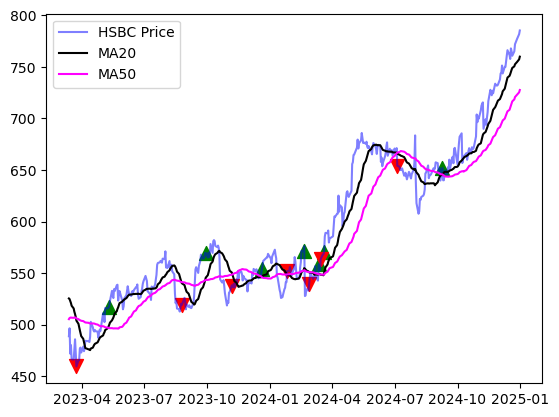

In [59]:
plt.plot(hsba['Close'], label='HSBC Price', c='blue', alpha=0.5)
plt.plot(hsba['MA20'], label='MA20', c='black', alpha=1)
plt.plot(hsba['MA50'], label='MA50', c='magenta', alpha=1)
plt.scatter(hsba.iloc[Buy_hsba].index,hsba.iloc[Buy_hsba]['Close'], marker= '^', c='green', s=100)
plt.scatter(hsba.iloc[Sell_hsba].index,hsba.iloc[Sell_hsba]['Close'], marker= 'v', c='red', s=100)
plt.legend()
plt.show()

In [61]:
buy_signal_hsba = hsba.iloc[Buy_hsba].Close
sell_signal_hsba = hsba.iloc[Sell_hsba].Close
sell_signal_hsba = sell_signal_hsba.iloc[1:]

In [63]:
sell_signal_hsba

Date
2023-08-25    519.175781
2023-11-07    537.282410
2024-01-26    552.108643
2024-02-27    539.131470
2024-03-15    563.749573
2024-07-05    654.075500
Name: Close, dtype: float64

In [65]:
combined_df_hsba = pd.concat([buy_signal_hsba, sell_signal_hsba])
combined_df_hsba = combined_df_hsba.reset_index()
combined_df.columns = ['Date', 'Close']
combined_df_hsba = combined_df_hsba.sort_values(by='Date').reset_index(drop=True)

In [67]:
combined_df_hsba

,Date,Close
0,2023-05-10,517.339966
1,2023-08-25,519.175781
2,2023-09-29,569.609497
3,2023-11-07,537.282410
4,2023-12-20,554.346069
5,2024-01-26,552.108643
6,2024-02-19,571.171570
7,2024-02-27,539.131470
8,2024-03-12,558.658813
9,2024-03-15,563.749573


In [69]:
hsba_returns_1 = (combined_df_hsba.Close.pct_change() + 1).cumprod()
hsba_returns = hsba_returns_1.iloc[1::2]

In [71]:
hsba_returns_1

0          NaN
1     1.003549
2     1.101035
3     1.038548
4     1.071531
5     1.067207
6     1.104055
7     1.042122
8     1.079868
9     1.089708
10    1.103193
11    1.264305
12    1.260238
Name: Close, dtype: float64

<Axes: >

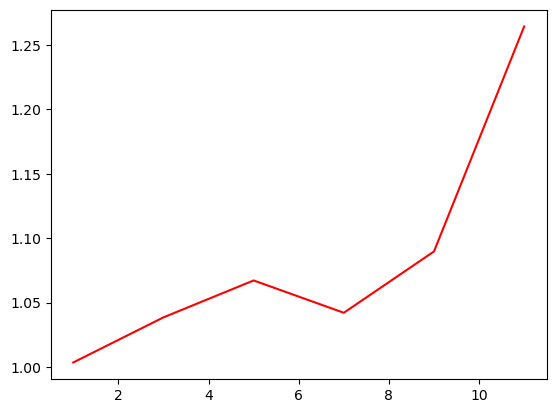

In [80]:
hsba_returns.plot(c = 'r')

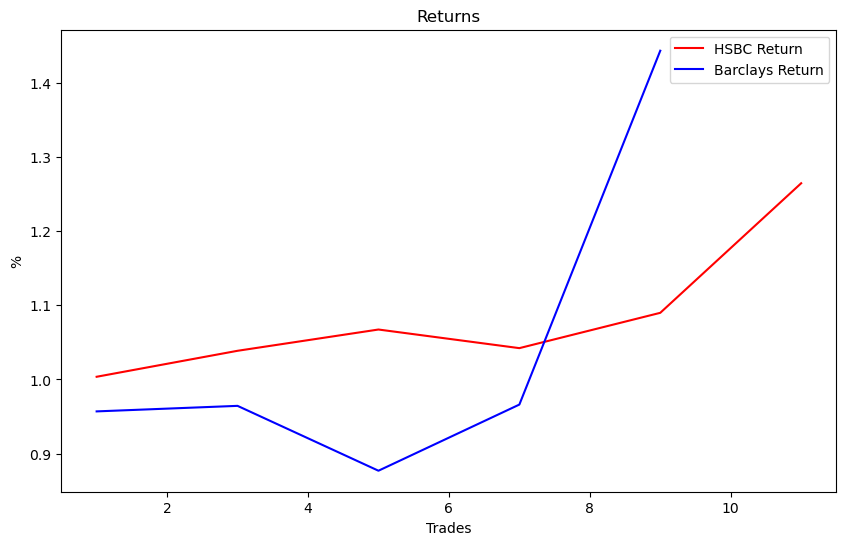

In [78]:
# Combining the two plots together to see the results. BARC had less trades and a rough 2023 while HSBC had more trades but less return. 
# The last positions that are still open are not shown on the shart. 
plt.figure(figsize=(10, 6))
plt.xlabel('Trades')
plt.ylabel('%')
plt.title('Returns')
plt.plot(hsba_returns, label='HSBC Return', c='r', alpha=1)
plt.plot(barc_returns, label='Barclays Return', c='b', alpha=1)
plt.legend()